In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import subprocess

try:
    import geopandas as gpd
except ModuleNotFoundError:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', 'geopandas'], stdout=subprocess.DEVNULL)
    import geopandas as gpd

In [85]:
%run ./Funcoes.ipynb

DataFrames:

In [86]:
df22 = pd.read_csv('https://dados.ufpe.br/dataset/cba99924-ad97-45f6-9d1c-f4fb7a940c6f/resource/3ec70513-eca6-453d-95d1-fde1f1972a11/download/discentes-2022-ufpe.csv') 
df21 = pd.read_csv('https://dados.ufpe.br/dataset/cba99924-ad97-45f6-9d1c-f4fb7a940c6f/resource/3b4468e4-1f72-49c1-bbf3-5d71216b85e5/download/discentes-ingressos-cursos-graduacao-2021-ufpe.csv')
dfall = df21.append(df22, ignore_index=True)
dfpe = gpd.read_file('DadosGeograficos/PE_Municipios_2021.shp')
dfrecife = gpd.read_file('http://dados.recife.pe.gov.br/dataset/c1f100f0-f56f-4dd4-9dcc-1aa4da28798a/resource/e43bee60-9448-4d3d-92ff-2378bc3b5b00/download/bairros.geojson')


Alunos por Cidade:

In [87]:
dfcidades = dfCidades(dfall)
dfpe['NM_MUN'] = dfpe['NM_MUN'].str.upper()
map_and_stats_pe=dfpe.merge(dfcidades, on="NM_MUN")

(-41.26665672144995,
 -34.49907329554999,
 -9.593394625949912,
 -7.162456601049958)

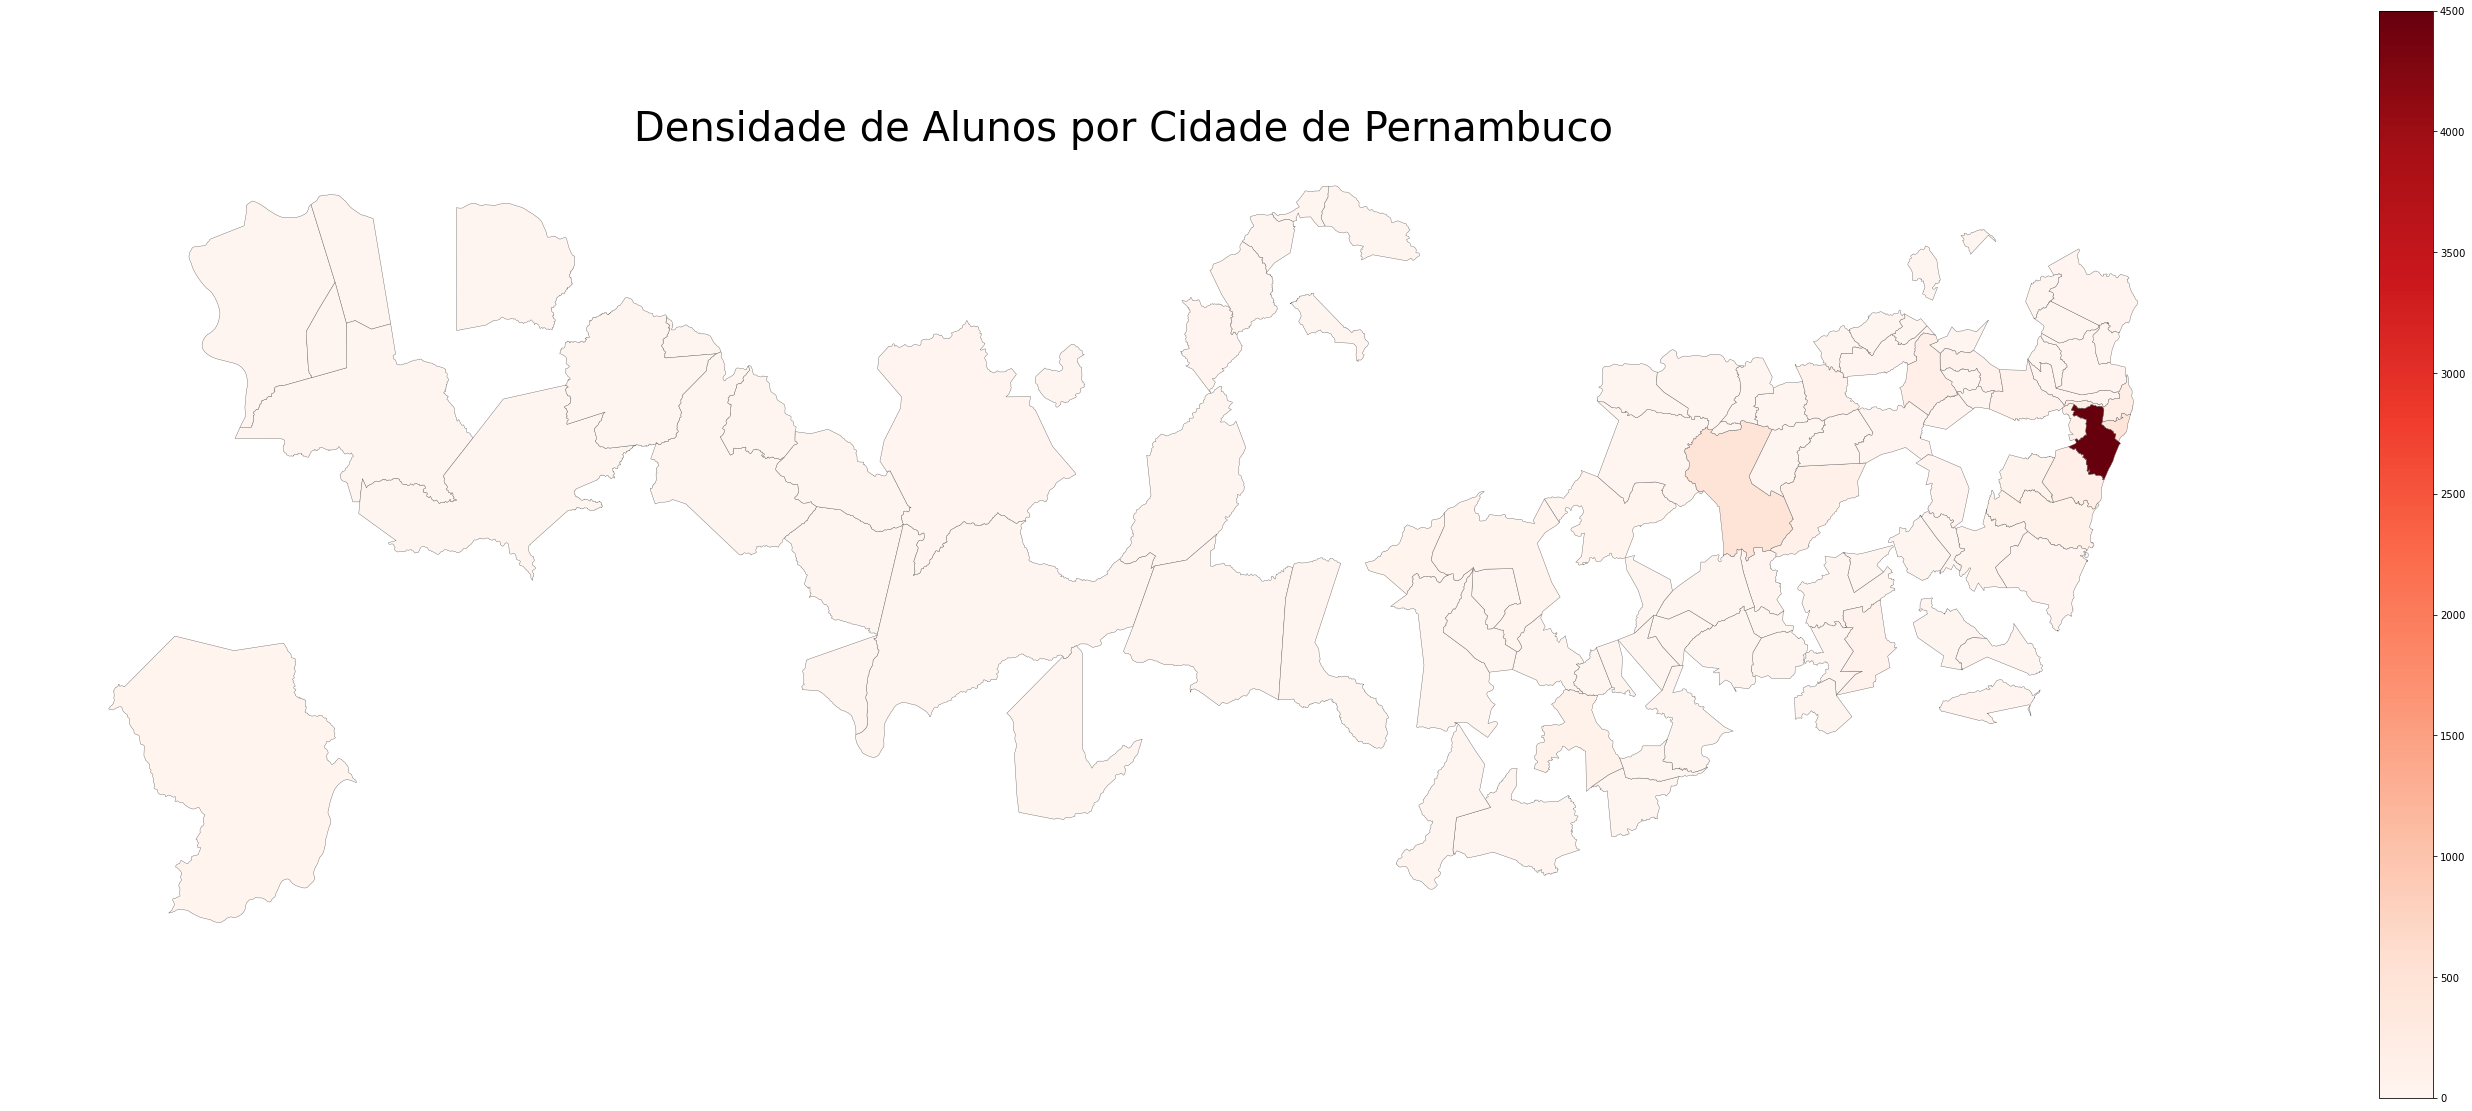

In [102]:
fig, ax = plt.subplots(1, figsize=(50, 20))
plt.xticks(rotation=90)
map_and_stats_pe.plot(column="Alunos", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=4500))
bar_info._A = []
cbar = fig.colorbar(bar_info)
plt.title(label = "Densidade de Alunos por Cidade de Pernambuco",fontsize=40)
ax.axis("off")

Alunos por Bairro:

In [89]:
dfbairros = dfBairros(dfall)
map_and_stats_rec=dfrecife.merge(dfbairros, on="bairro_nome_ca")

(-35.02656241739515,
 -34.849511611585676,
 -8.166782392960442,
 -7.915054767400497)

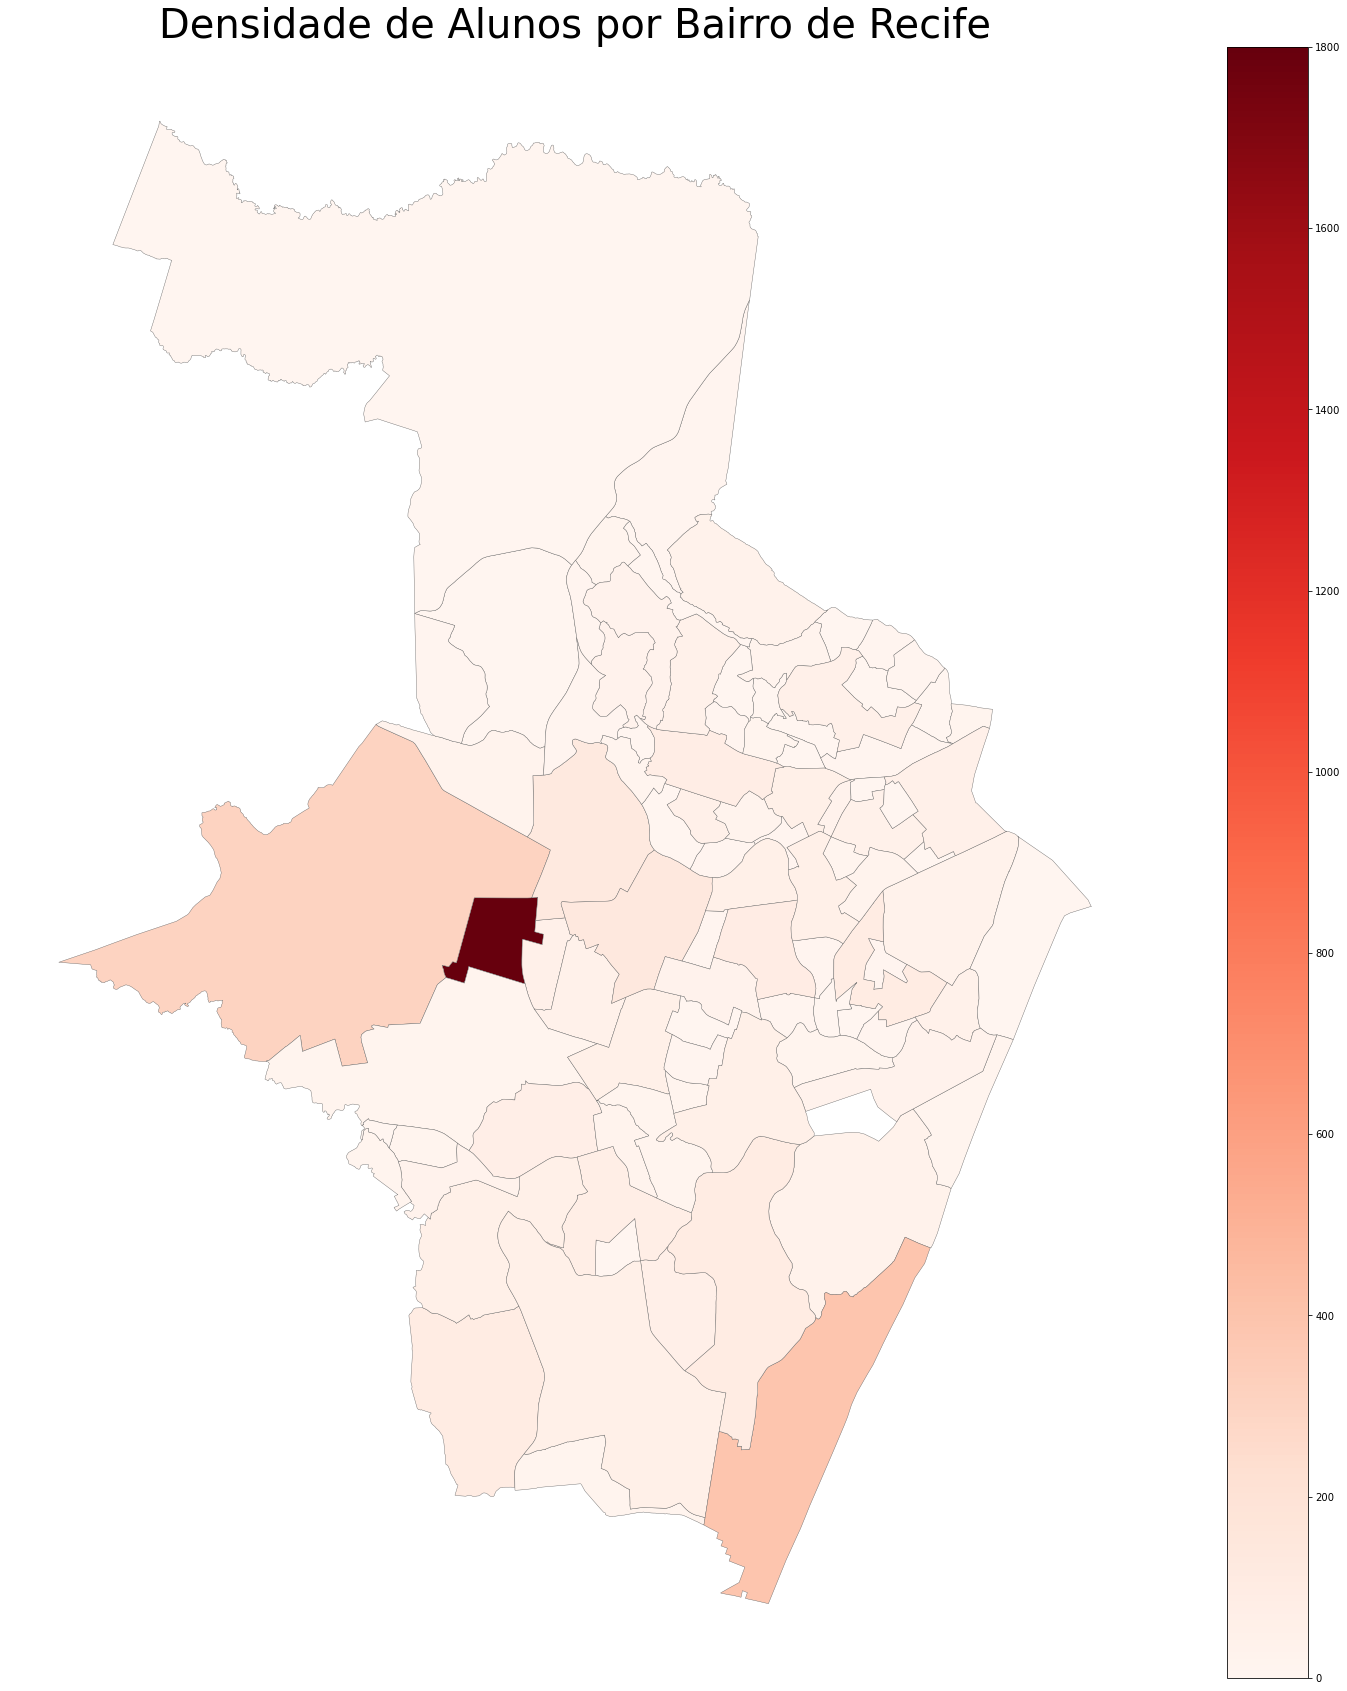

In [92]:
fig1, ax1 = plt.subplots(1, figsize=(30, 30))
plt.xticks(rotation=90)
map_and_stats_rec.plot(column="Alunos", cmap="Reds", linewidth=0.4, ax=ax1, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=1800))
bar_info._A = []
cbar = fig1.colorbar(bar_info)
plt.title(label = "Densidade de Alunos por Bairro de Recife",fontsize=40)
ax1.axis("off")